# AND Logic Gate Perceptron

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
w1, w2, b = 0.5, 0.5, -1

In [3]:
def activation_fucntion(x):
    return 1 if x >= 0 else 0

In [19]:
errors = []
def train_perceptron(inputs, desired_outputs, learning_rate, epochs):
    global w1, w2, b
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            A, B = inputs[i]
            target_output = desired_outputs[i]
            output = activation_fucntion(w1 * A + w2 * B + b)
            error = target_output - output
            w1 += learning_rate * error * A
            w2 += learning_rate * error * B
            b += learning_rate * error
            total_error += abs(error)
        errors.append(error)
        if total_error == 0:
            break

In [47]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
desired_outputs = np.array([0, 0, 0, 1])
learning_rate = 0.1
epochs = 100

In [49]:
train_perceptron(inputs, desired_outputs, learning_rate, epochs)

for i in range(len(inputs)):
    A, B = inputs[i]
    output = activation_fucntion(w1 * A + w2 * B + b)
    print(f"Input: ({A}, {B})  Output: {output}")

0 0
0 1
1 0
1 1
Input: (0, 0)  Output: 0
Input: (0, 1)  Output: 0
Input: (1, 0)  Output: 0
Input: (1, 1)  Output: 1


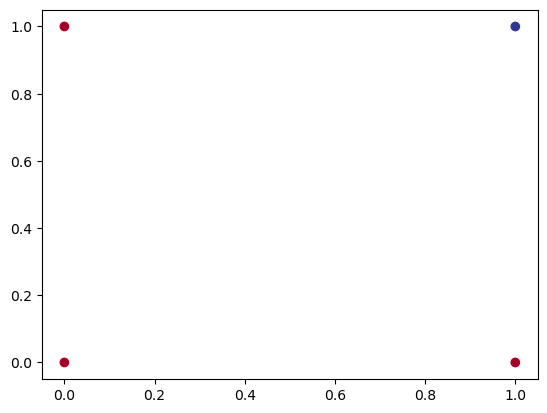

In [55]:
plt.scatter(inputs[:,0],inputs[:,1], c = desired_outputs, cmap =plt.cm.RdYlBu);

In [59]:
x_min, x_max = inputs[:, 0].min() - 0.1, inputs[:,0].max() + 0.1
y_min, y_max = inputs[:, 1].min() - 0.1, inputs[:, 1].max() + 0.1

In [61]:
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

In [63]:
x_in = np.c_[xx.ravel(), yy.ravel()]

In [65]:
x_in

array([[-0.1       , -0.1       ],
       [-0.08787879, -0.1       ],
       [-0.07575758, -0.1       ],
       ...,
       [ 1.07575758,  1.1       ],
       [ 1.08787879,  1.1       ],
       [ 1.1       ,  1.1       ]])

In [69]:
y_pred = []
for i in range(len(x_in)):
    A, B = x_in[i]
    y_pred.append(activation_fucntion(w1 * A + w2 * B + b))

In [73]:
y_pred = np.round(y_pred).reshape(xx.shape)

(-0.1, 1.1)

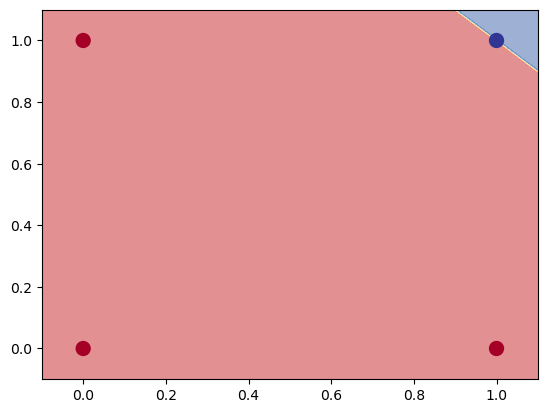

In [83]:
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.5 )
plt.scatter(inputs[:,0], inputs[:, 1], c=desired_outputs, s=100, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())